# Homework 06 | WEEK 06 (11.10-17.10.2022) | Machine Learning Zoomcamp

Link the homework: [here](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/06-trees/homework.md)

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices) or download using wget link mentioned below:

```
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

```

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

## Loading the data

Use only the following columns:  
* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`  

In [1]:
#data ='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [2]:
#!wget $data -O data-homework-6.csv

In [3]:
ls

data-homework-6.csv  homework-06-solution.ipynb


In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity'
]
df = pd.read_csv('data-homework-6.csv', usecols=features)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* Fill NAs with 0.
* Apply the log tranform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer` to turn the dataframe into matrices.

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df['total_bedrooms'].fillna(0, inplace = True)

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df['median_house_value'] = np.log1p(df['median_house_value'].values)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY


In [12]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

df_train = df_train.reset_index(drop = True)
df_val   = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_full_train = df_full_train.reset_index(drop = True)

y_train = df_train.median_house_value
y_val = df_val.median_house_value
y_test = df_test.median_house_value

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [13]:
from sklearn.feature_extraction import DictVectorizer

In [14]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)


## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity=INLAND`
* `total_rooms`
* `latitude`
* `population`

In [15]:
from sklearn.tree import DecisionTreeRegressor


In [16]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [17]:
from sklearn.tree import export_text
   
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Answer to question 1:**

`ocean_proximity=INLAND` is used for data splitting.

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.05
* 0.25
* 0.55
* 0.85

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor(n_estimators=10, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [29]:
y_pred = rf.predict(X_val)

In [30]:
from sklearn.metrics import mean_squared_error

In [32]:
mean_squared_error(y_pred, y_val, squared=False).round(2)

0.25

**Answer to question 2:**

`0.25`

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 150

In [41]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    
    scores.append((n, rmse))

In [42]:
scores

[(10, 0.2456601287532493),
 (20, 0.23883100508431507),
 (30, 0.23533513359926886),
 (40, 0.23425705015789774),
 (50, 0.23299051006423963),
 (60, 0.23276663500988132),
 (70, 0.2323367430251649),
 (80, 0.2324032922144551),
 (90, 0.2321072456325008),
 (100, 0.23192762024978078),
 (110, 0.23147508640653833),
 (120, 0.2315285334021738),
 (130, 0.23163264491363295),
 (140, 0.23160551396177226),
 (150, 0.2316036534789483),
 (160, 0.23154043638797991),
 (170, 0.2314315280230505),
 (180, 0.23163349793869303),
 (190, 0.23162048688517484),
 (200, 0.23151712261805216)]

In [43]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.245660
1,20,0.238831
2,30,0.235335
3,40,0.234257
4,50,0.232991
5,60,0.232767
6,70,0.232337
7,80,0.232403
8,90,0.232107
9,100,0.231928


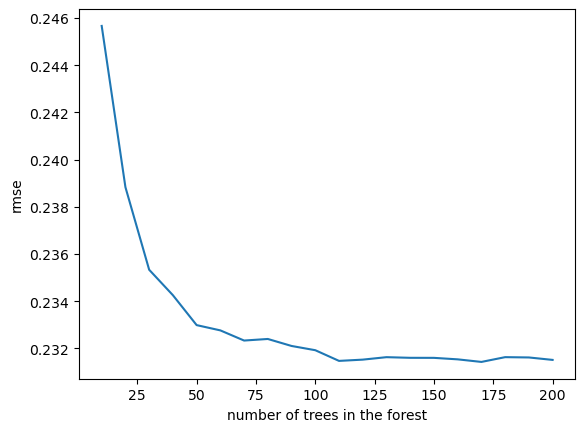

In [44]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.xlabel('number of trees in the forest')
plt.ylabel('rmse')
plt.show()

Thus out of the options: 10, 50, 70 and 150, rmse stops improving after 150.

**Answer to question 3:**

`150`

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`


What's the best `max_depth`:

* 10
* 15
* 20
* 25

In [45]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators = n, 
                                   max_depth = d, 
                                   random_state = 1, 
                                   n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)

        scores.append((d, n, rmse))

In [47]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,n_estimators,rmse
0,10,10,0.254599
1,10,20,0.252577
2,10,30,0.251463
3,10,40,0.250919
4,10,50,0.250069
...,...,...,...
75,25,160,0.231485
76,25,170,0.231436
77,25,180,0.231552
78,25,190,0.231530


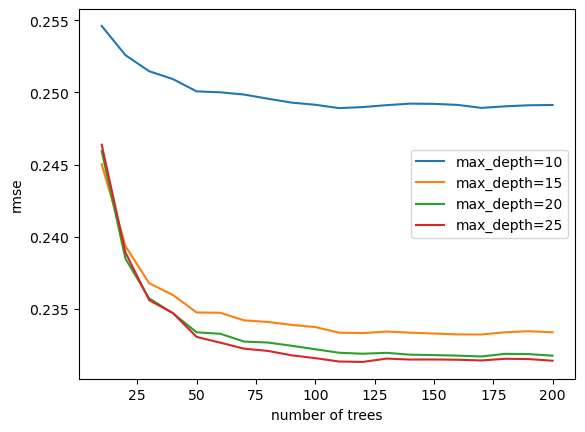

In [48]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)


plt.legend()
plt.xlabel('number of trees')
plt.ylabel('rmse')
plt.show()

**Answer to question 4:**

Best `max_depth` is `25` 

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature? 

* `total_rooms`
* `median_income`	
* `total_bedrooms`
* `longitude`

In [50]:
rf = RandomForestRegressor(n_estimators = 10,
                           max_depth = 20,
                           random_state = 1,
                           n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [51]:
rf.feature_importances_

array([1.63873827e-02, 3.31454580e-02, 1.01255849e-01, 9.64702137e-02,
       3.63325843e-01, 2.48880276e-03, 3.10900842e-01, 3.56806263e-04,
       4.80369796e-04, 4.69876693e-03, 3.07769212e-02, 1.91716318e-02,
       2.05411131e-02])

In [54]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names_out()
df_importances['importance'] = rf.feature_importances_
df_importances

,feature,importance
0,households,0.016387
1,housing_median_age,0.033145
2,latitude,0.101256
3,longitude,0.096470
4,median_income,0.363326
5,ocean_proximity=<1H OCEAN,0.002489
6,ocean_proximity=INLAND,0.310901
7,ocean_proximity=ISLAND,0.000357
8,ocean_proximity=NEAR BAY,0.000480
9,ocean_proximity=NEAR OCEAN,0.004699


In [61]:
df_importances.sort_values(by='importance', ascending=False)

,feature,importance
4,median_income,0.363326
6,ocean_proximity=INLAND,0.310901
2,latitude,0.101256
3,longitude,0.096470
1,housing_median_age,0.033145
10,population,0.030777
12,total_rooms,0.020541
11,total_bedrooms,0.019172
0,households,0.016387
9,ocean_proximity=NEAR OCEAN,0.004699


Text(0.5, 0, 'Random Forest Feature Importance')

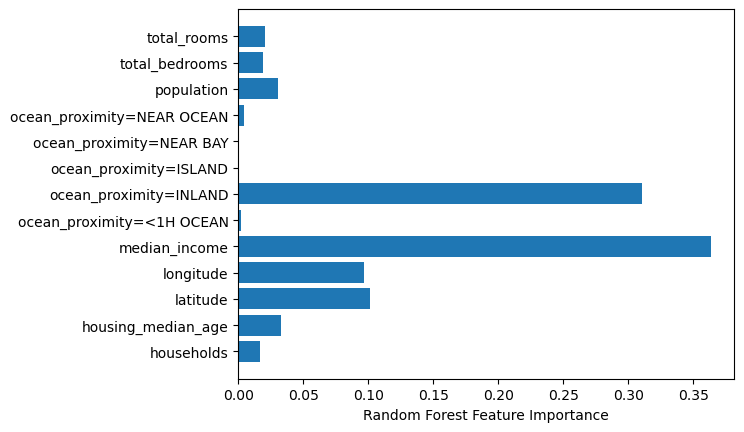

In [64]:
plt.barh(df_importances.feature, df_importances.importance)
plt.xlabel("Random Forest Feature Importance")

**Answer to question 5:**
    
`median_income` is the most important feature.

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both gives same

In [65]:
!pip install xgboost

In [66]:
import xgboost as xgb

In [69]:
features = dv.get_feature_names_out()
features 

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'ocean_proximity=ISLAND',
       'ocean_proximity=NEAR BAY', 'ocean_proximity=NEAR OCEAN',
       'population', 'total_bedrooms', 'total_rooms'], dtype=object)

In [70]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

ValueError: feature_names must be string, and may not contain [, ] or <

We need to remove the above error:

In [71]:
features= [i.replace("=<", "_").replace("=","_") for i in features]
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity_1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [72]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [73]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [74]:
scores = {}

In [75]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',    
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

In [78]:
scores['eta=0.3'] = parse_xgb_output(output)

Now with `eta = 0.1`

In [79]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',    
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

In [80]:
scores['eta=0.1'] = parse_xgb_output(output)

In [81]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    8.12733  8.13245
 1          1    5.69586  5.70070
 2          2    3.99540  4.00041
 3          3    2.80712  2.81079
 4          4    1.97834  1.98175
 ..       ...        ...      ...
 95        95    0.13553  0.22630
 96        96    0.13458  0.22620
 97        97    0.13372  0.22608
 98        98    0.13344  0.22611
 99        99    0.13299  0.22610
 
 [100 rows x 3 columns],
 'eta=0.1':     num_iter  train_auc   val_auc
 0          0   10.44372  10.44938
 1          1    9.40118   9.40684
 2          2    8.46290   8.46831
 3          3    7.61859   7.62391
 4          4    6.85878   6.86368
 ..       ...        ...       ...
 95        95    0.18541   0.23106
 96        96    0.18470   0.23089
 97        97    0.18405   0.23067
 98        98    0.18385   0.23057
 99        99    0.18329   0.23054
 
 [100 rows x 3 columns]}

Text(0, 0.5, 'mse score')

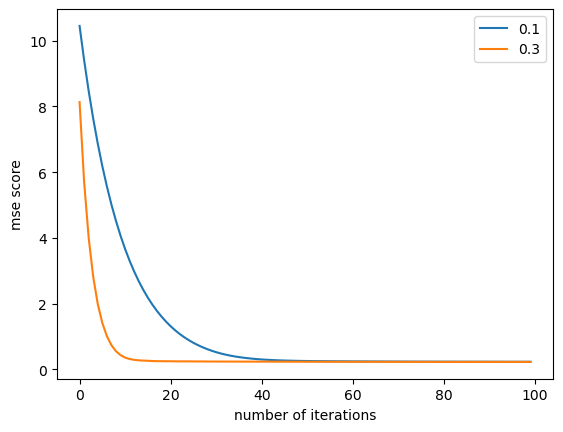

In [83]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend()

plt.xlabel('number of iterations')
plt.ylabel('mse score')

Thus, both `eta` leads to the same mse score.

Links for submitting homework [here](https://forms.gle/3yMSuQ4BeNuZFHTU8)

*******